In [ ]:
#
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
!pwd

/content/drive/My Drive


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import pandas as pd

#랜덤시드3
import random
random.seed(3)

targetUrl_heartDiseaseClassificationDataset="https://raw.githubusercontent.com/Minon98/Python/main/heart%20disease%20classification%20dataset.csv"
df = pd.read_csv(targetUrl_heartDiseaseClassificationDataset)

df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [ ]:
df.dtypes

Unnamed: 0      int64
age             int64
sex            object
cp              int64
trestbps      float64
chol          float64
fbs             int64
restecg         int64
thalach       float64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target         object
dtype: object

In [ ]:
#결측치 측정
df.isnull().sum().sort_values(ascending=False)

thalach       5
trestbps      4
chol          1
Unnamed: 0    0
age           0
sex           0
cp            0
fbs           0
restecg       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [ ]:
#결측치 평균으로 채우기
df=df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#sex , target one-hot encoding
df = pd.get_dummies(df)
df

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_female,sex_male,target_no,target_yes
0,0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,0,1,0,1
1,1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,0,1,0,1
2,2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1,0,0,1
3,3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,0,1,0,1
4,4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3,1,0,1,0
299,299,45,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3,0,1,1,0
300,300,68,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3,0,1,1,0
301,301,57,0,131.712375,131.0,0,1,115.0,1,1.2,1,1,3,0,1,1,0


In [ ]:
# standardization을 위한 object type 제거
df_scale = df.copy()
df_scale.drop(['sex_female', 'sex_male', 'target_no', 'target_yes'], axis=1, inplace=True)
df_scale

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1
1,1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2
2,2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2
3,3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2
4,4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3
299,299,45,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3
300,300,68,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3
301,301,57,0,131.712375,131.0,0,1,115.0,1,1.2,1,1,3


In [ ]:
#자료 standardization
scaler = StandardScaler()
scaler.fit(df_scale)
df_scaled = scaler.transform(df_scale)
df_scaled = pd.DataFrame(data=df_scaled, columns=df_scale.columns)
print(df_scaled)

     Unnamed: 0       age        cp      trestbps      chol       fbs  \
0     -1.726344  0.952197  1.973123  7.600324e-01 -0.257417  2.394438   
1     -1.714911 -1.915313  1.002577 -9.794528e-02  0.071170 -0.417635   
2     -1.703478 -1.474158  0.032031 -9.794528e-02 -0.817947 -0.417635   
3     -1.692046  0.180175  0.032031 -6.699304e-01 -0.199431 -0.417635   
4     -1.680613  0.290464 -0.938515 -1.625679e-15  2.081349 -0.417635   
..          ...       ...       ...           ...       ...       ...   
298    1.680613  0.290464 -0.938515  4.740398e-01 -0.102787 -0.417635   
299    1.692046 -1.033002  1.973123 -1.241915e+00  0.341771 -0.417635   
300    1.703478  1.503641 -0.938515  7.028339e-01 -1.030562  2.394438   
301    1.714911  0.290464 -0.938515 -1.625679e-15 -2.228938 -0.417635   
302    1.726344  0.290464  0.032031 -9.794528e-02 -0.199431 -0.417635   

      restecg   thalach     exang   oldpeak     slope        ca      thal  
0   -1.005832  0.006009 -0.696631  1.087338 -2.

In [ ]:
#원핫인코딩된 성별 합치기
df_heart = pd.concat([df_scaled,df['sex_male']],axis=1)
df_heart = pd.concat([df_heart,df['sex_female']],axis=1)
df_heart.columns

Index(['Unnamed: 0', 'age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'sex_male',
       'sex_female'],
      dtype='object')

In [ ]:
#모델 구성
X = df_heart.iloc[:, 1:16]
y = df.iloc[:, 14:16]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)        #test dataset 10%

model = Sequential()
model.add(Dense(32, input_dim=14, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                480       
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,042
Trainable params: 1,042
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#earlystopping 20번마다 val_acc가 나아지지 않으면 멈춤 - 제일 좋은 val_acc 저장
es = EarlyStopping(monitor='val_accuracy',verbose = 1, patience = 20, mode = 'max')
mc = ModelCheckpoint('/content/drive/My Drive/Heart.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose = 1)

In [ ]:
history= model.fit(X_train, y_train, epochs=2000, batch_size=10, validation_split=0.2, callbacks=[es, mc]) #validation 20%

Epoch 1/2000
22/22 [==============================] - ETA: 0s - loss: 0.9379 - accuracy: 0.5945 
Epoch 1: val_accuracy improved from -inf to 0.69091, saving model to /content/drive/My Drive/Heart.h5
22/22 [==============================] - 1s 15ms/step - loss: 0.9379 - accuracy: 0.5945 - val_loss: 0.7805 - val_accuracy: 0.6909
Epoch 2/2000
 1/22 [>.............................] - ETA: 0s - loss: 0.7374 - accuracy: 0.6000
Epoch 2: val_accuracy improved from 0.69091 to 0.74545, saving model to /content/drive/My Drive/Heart.h5
22/22 [==============================] - 0s 5ms/step - loss: 0.8567 - accuracy: 0.6636 - val_loss: 0.7520 - val_accuracy: 0.7455
Epoch 3/2000
 1/22 [>.............................] - ETA: 0s - loss: 0.7273 - accuracy: 0.7000
Epoch 3: val_accuracy did not improve from 0.74545
22/22 [==============================] - 0s 4ms/step - loss: 0.8576 - accuracy: 0.7189 - val_loss: 0.7331 - val_accuracy: 0.7455
Epoch 4/2000
 1/22 [>.............................] - ETA: 0s - l

In [ ]:
ls

 assets/             Heart.h5            saved_model.pb
'Colab Notebooks'/   keras_metadata.pb   variables/


In [ ]:
#저장된 모델을 가져와 모델을 테스트셋에 적용해 정확도를 구합니다. 

#Model 불러오기
from tensorflow.python.keras.models import load_model
model = load_model('Heart.h5')

score=model.evaluate(X_test, y_test, batch_size= 10)
print('test_loss: ' , score[0])
print('test_accuracy: ', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.9897 - accuracy: 0.9355
test_loss:  0.9897136688232422
test_accuracy:  0.9354838728904724


## 변화
- 1차
test_loss:  0.8526384234428406
test_accuracy:  0.774193525314331
- 2차
test_loss:  0.8885266780853271
test_accuracy:  0.8387096524238586
- 3차
test_loss:  1.4293769598007202
test_accuracy:  0.8387096524238586
- 4차
test_loss:  1.1191447973251343
test_accuracy:  0.9032257795333862
- 5차
test_loss:  0.9897136688232422
test_accuracy:  0.9354838728904724

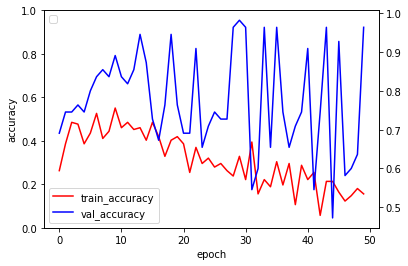

In [ ]:
#시각화 - 과적합 확인
